In [104]:
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib as mpl

import numpy as np

%matplotlib inline

plt.style.use('ggplot')

pd.set_option('precision',3)

pd.__version__

u'0.17.1'

In [105]:
SSF_subsidies = pd.read_csv("SSF_subsidies.csv")
countries = pd.read_csv("Country_Data.csv")
catch = pd.read_csv("SAU_Catches.csv")
type_EEZ = pd.read_csv("Subtype_Fleet_EEZ.csv")
all_subsidies = pd.read_csv("Subsidies2009.csv")

In [106]:
SSF_subsidies.groupby(['SubType']).sum()

,ID,Cnumber,RegionID,total_subsidies,NewData,Developed,HDI_2005,SSFsubsidies_assessed_percent,Data_group,SSF_totalCatch_EEZ_percent,%SSF_totalCatch_Country,SSF_USD_1000,Ref
SubType,,,,,,,,,,,,,
Boat constsruct. & renov.,79159,34169,198,3168111.752,19,25,50.789,776.600,100,2432.7,2362.2,496065.797,NaN
Fisher assistance,79663,34169,198,1931994.599,23,25,50.789,842.720,67,2432.7,2362.2,476792.298,NaN
Fisheries dev. projects,79231,34169,198,939904.441,52,25,50.789,2032.259,127,2432.7,2362.2,220795.191,NaN
Fisheries mangt.,78943,34169,198,6930751.048,22,25,50.789,2063.144,180,2432.7,2362.2,1740794.881,NaN
Fishery R&D,79015,34169,198,2594717.863,17,25,50.789,1622.736,151,2432.7,2362.2,525599.315,NaN
Fishing access,79519,34169,198,901778.521,12,25,50.789,0.000,44,2432.7,2362.2,0.000,NaN
Fishing port develop.,79303,34169,198,3453075.017,5,25,50.789,418.200,53,2432.7,2362.2,720078.691,NaN
Fuel subsidies,81305,34899,206,7389833.299,26,26,54.559,916.900,27,2432.7,2362.2,246785.533,NaN
MPAs,79087,34169,198,1161063.546,1,25,50.789,2066.100,191,2432.7,2362.2,240875.185,NaN


In [107]:
catch.groupby(['EEZ']).sum()

,Developed,Recreational,Subsistence,Artisanal,Industrial,total_catch,SSF_catch
EEZ,,,,,,,
False,41,823.0,3620.34,22764.82,82864.25,110072.6,26385.2
True,41,818.5,3609.56,22727.97,79156.04,106312.0,26337.5


In [108]:


SSF_subsidies['SSF_subsidies_percent'] = SSF_subsidies['SSF_USD_1000']/SSF_subsidies['total_subsidies']


#  merge original all subsidies data with to align with subsidy 
#  type and whether the EEZ catch data or the FLeet catch data apply, 
#  see type_EEZ data, this is in preparation to later merge with SAU_catch data 

subsidies_type = pd.merge(
    left=all_subsidies,
    right=type_EEZ,
    how='left'
)


#  now this needs to be merged with country data to have coordinates per country
#  and have each country data point assigned to a subregion (thanks to Andres data)

subsidies_type_countries = pd.merge(
    left=subsidies_type,
    right=countries,
    how='left'
)


#  calculate SSF catch percent by dividing SSF catch / total catch

catch['SSF_catch_percent']=catch['SSF_catch']/catch['total_catch']


#  merge with SSF catch from SAU_catch data

subsidies_type_countries_catch = pd.merge(
    left=subsidies_type_countries,
    right=catch, how='left'
)

#  calculating mean SSF catch per subregion, 
#  needed to use to fill gaps for SSF subsidies that have not been assessed

catch_countries = pd.merge(
    left=catch, 
    right=countries, 
    how='left'
)

In [109]:

catch_by_subregion = catch_countries.groupby(['Subregion']).sum()
catch_by_subregion['SSF_subregion_catch'] = (
    catch_by_subregion['SSF_catch']/catch_by_subregion['total_catch']
)

catch_by_subregion = catch_by_subregion.reset_index()

SSF_subregion_catch = catch_by_subregion.loc[:,['Subregion','SSF_subregion_catch']]



#  merging mean catch with all subsidies data
subsidies_type_countries_catch_meancatch = pd.merge(
    left=subsidies_type_countries_catch,right=SSF_subregion_catch, how='left'
) 

#  preparing SSF subsidies by merging with country data
SSF_subsidies_countries = pd.merge(
    left=SSF_subsidies,right=countries, how='left')

#  from SSF subsidies assessed calculate mean per subregion and per type 
#  to fill gaps of countries that have not been assessed
SSF_by_subregion = SSF_subsidies_countries.groupby(
    ['Subregion','Type']).sum(
)


SSF_by_subregion['SSF_subsidies_subregion'] = (
    SSF_by_subregion['SSF_USD_1000']/SSF_by_subregion['total_subsidies']
)
SSF_by_subregion = SSF_by_subregion.reset_index()
SSF_subsidies_subregion = SSF_by_subregion.loc[:,['Subregion','Type','SSF_subsidies_subregion']]


In [110]:

#  as not all subsidies types are covered by countries assessed, 
#  mean values for region are being calculated to replace the empty cells
SSF_by_region = SSF_subsidies_countries.groupby(
    ['RegionName','Type']).sum(
)
SSF_by_region['SSF_subsidies_region'] = (
    SSF_by_region['SSF_USD_1000']/SSF_by_region['total_subsidies']
)
SSF_by_region = SSF_by_region.reset_index()
SSF_subsidies_region = SSF_by_region.loc[
    :,['RegionName','Type','SSF_subsidies_region']
]

#  merge mean subsidies by type and subregion to all subsidies data
catch_subsidies_subregion = pd.merge(
    left=subsidies_type_countries_catch_meancatch,right=SSF_subsidies_subregion, how='left'
)


#  merge mean subsidies by type and region to all subsidies data that now have included total subsidies per subregion
catch_subsidies_subregion_region = pd.merge(
    left=catch_subsidies_subregion,right=SSF_subsidies_region, how='left'
)

#  fill gaps from mean subsidies per subregion with mean subsidies per region and name new column ['subsidies_subregion_all']

#  create new column and name ['SSF_subsidies_true] and state true for all values > 0 

catch_subsidies_subregion_region['total_subsidies_true'] = np.where(
    catch_subsidies_subregion_region['total_subsidies'] > 0, True, False
)
    
def check_data(index=0):
    df = catch_subsidies_subregion_region
    print("ssf all: {}, total: {}".format(df['total_subsidies_true'][index], df['total_subsidies'][index]))
    
check_data(1946)

#  make a new column that states True for NaN in subsidies per subregion and name ['total_subregion_NaN']

catch_subsidies_subregion_region['total_subregion_NaN'] = pd.isnull(catch_subsidies_subregion_region['SSF_subsidies_subregion'])


def check_data(index=0):
    print("ssf all: {}, total: {}".format(catch_subsidies_subregion_region['SSF_subsidies_subregion'][index], catch_subsidies_subregion_region['total_subregion_NaN'][index]))
    
check_data(1946)



ssf all: True, total: 26849.2514743
ssf all: 0.0, total: False


In [111]:
#  create a new column that states True when ['total_subregion_NaN'] is True and ['SSF_subsidies_true] is True
#  name new column ['total_subregion_all']
#  this shows when True that there is a total subsidy for that category 
#  but no value from total subregion subsidy data and therefore we will replace with the total region value

catch_subsidies_subregion_region['total_subregion_all'] = np.where((catch_subsidies_subregion_region['total_subsidies_true'] == True) & (catch_subsidies_subregion_region['total_subregion_NaN'] == True), True, False)


def check_data(index=0):
    print("ssf all: {0}, total: {1}, isNaN: {2}".format(catch_subsidies_subregion_region['total_subregion_all'][index],catch_subsidies_subregion_region['total_subsidies_true'][index], catch_subsidies_subregion_region['total_subregion_NaN'][index]))

check_data(1056)

ssf all: False, total: True, isNaN: False


In [112]:
#  create new column and name ['subsidies_subregion_all'] to use value from subregion or from region
#  when ['total_subregion_all'] is true use region data when false use subregion data


#  catch_subsidies_subregion_region['subsidies_subregion_all'] = 
#  np.where(catch_subsidies_subregion_region['total_subregion_all'] == True, 
#  catch_subsidies_subregion_region['SSF_subsidies_region'], 
#  catch_subsidies_subregion_region['SSF_subsidies_subregion'])


catch_subsidies_subregion_region['subsidies_subregion_all'] = np.where(catch_subsidies_subregion_region['total_subregion_all'] == True, catch_subsidies_subregion_region['SSF_subsidies_region'], catch_subsidies_subregion_region['SSF_subsidies_subregion'])

catch_subsidies_subregion_region

def check_data(index=0):
    print("ssf all: {0}, total: {1}, isNaN: {2}".format(catch_subsidies_subregion_region['subsidies_subregion_all'][index],catch_subsidies_subregion_region['total_subregion_all'][index], catch_subsidies_subregion_region['SSF_subsidies_region'][index]))

check_data(1146)

ssf all: 0.345222623209, total: False, isNaN: 0.211431702815


In [113]:
np.sum(catch_subsidies_subregion_region['total_subsidies'])

35371111.003231212

In [114]:
countries.columns.values

array(['CID', 'Countries', 'Subregion', 'CLon', 'CLat', 'SIDS', 'TotPop',
       'HDI', 'Develop', 'GDP', 'EU member'], dtype=object)

In [115]:
#  toshorten the create dataframe, creat subsidies1 that only include at this point relevant columns

subsidies1 = catch_subsidies_subregion_region.loc[:,['RegionName','Subregion','Countries','CLon', 'CLat','SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'EU member', 'Category','SubType','Type','EEZ','total_catch', 'total_subsidies','SSF_catch_percent','SSF_subregion_catch','subsidies_subregion_all']]

#  create a new column 'Factor' and calculate as adjustment value for total subsidies per subregion and total SSF catch per subregion 
#  used to fill gaps for country that have not been assessed, this is done per subsidy subtype also

subsidies1['Factor'] = subsidies1['SSF_catch_percent']/subsidies1['SSF_subregion_catch']

#  multiply the "Factor" value with the mean subsidy value per subregion
#  to estimate the value for SSF subsidies per subsidy type for the countries that have not been assessed
subsidies1['SSF_subsidies_estimates'] = subsidies1['Factor']*subsidies1['subsidies_subregion_all']


#  to make sure none of the estimated values exceed 1 (100%) the SSF_subsidies_estimate will be capped at 1

subsidies1['SSF_subsidies_estimates_big'] = subsidies1['SSF_subsidies_estimates'] > 1

subsidies1['SSF_estimates_corrected'] = np.where(subsidies1['SSF_subsidies_estimates_big'] == True, 1, subsidies1['SSF_subsidies_estimates'])

def check_data(index=0):
    print("ssf_estimates: {0}, ssf_big: {1}, SSF_corrected: {2}".format(subsidies1['SSF_subsidies_estimates'][index],subsidies1['SSF_subsidies_estimates_big'][index], subsidies1['SSF_estimates_corrected'][index]))

check_data(1002)


ssf_estimates: 1.11444766273, ssf_big: True, SSF_corrected: 1.0


In [116]:
#  shorten SSF subsidy data, that contains originally assessed SSF subsidy values

SSF_subsidies_short = SSF_subsidies_countries.loc[:,[
        'Countries','Type','SSFsubsidies_assessed_percent','weighted_by_sectorsize',
        'Data_group','SSF_USD_1000','SSF_subsidies_percent']
                                                 ]


#  merge estimated values for subsidies with SSF assessed subsidies data
SSF_subsidies_estimates_assessed = pd.merge(
    left=subsidies1,right=SSF_subsidies_short,how='left'
)

#  use fillna function to use estimated values for SSF subsidies to fill gaps of countries that have not been assessed
SSF_subsidies_estimates_assessed['SSF_subsidies_percent_all'] = SSF_subsidies_estimates_assessed[
    'SSF_subsidies_percent'].fillna(
    SSF_subsidies_estimates_assessed['SSF_estimates_corrected']
)

#  calculate USD values for all SSF for all subtypes and countries form the estimated and assessed percentages
SSF_subsidies_estimates_assessed['SSF_subsidies_USD'] = (
    SSF_subsidies_estimates_assessed['total_subsidies']
)*SSF_subsidies_estimates_assessed['SSF_subsidies_percent_all']

#  rename column names to make it easy for visualization and graphs and calculate LSF subsidies

SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.rename(columns={'SSF_subsidies_USD':'SSF subsidies'})

SSF_subsidies_estimates_assessed['LSF subsidies'] = SSF_subsidies_estimates_assessed['total_subsidies'] - SSF_subsidies_estimates_assessed['SSF subsidies']

SSF_subsidies_estimates_assessed.to_csv('SSF_subsidies_all.csv')

print np.sum(SSF_subsidies_estimates_assessed['SSF subsidies'])
print np.sum(SSF_subsidies_estimates_assessed['total_subsidies'])
print np.sum(SSF_subsidies_estimates_assessed['LSF subsidies'])

subsidies1.to_csv('check_subsidies1.csv')


5448987.4865
35371111.0032
29922123.5167


In [117]:
35371111.0032-5105976.14144

30265134.86176

In [118]:

SSFglobalpercent = np.sum(SSF_subsidies_estimates_assessed['SSF subsidies'])/np.sum(catch_subsidies_subregion_region['total_subsidies'])*100

SSFglobalpercent

15.405191784894919

In [119]:

#  prepare for plotting global subsidies per category

Subsidies_per_Category = SSF_subsidies_estimates_assessed.groupby(['Category']).sum()

Subsidies_per_Category['SSF percent'] = Subsidies_per_Category['SSF subsidies']/Subsidies_per_Category['total_subsidies']*100
print Subsidies_per_Category['SSF percent']
Subsidies_per_Category_short = Subsidies_per_Category.loc[:,['LSF subsidies', 'SSF subsidies','total_subsidies']]

Subsidies_per_Category_short['check'] = Subsidies_per_Category_short['LSF subsidies'] + Subsidies_per_Category_short['SSF subsidies']
Subsidies_per_Category_short




Category
Ambiguous             14.828
Beneficial            24.313
Capacity-enhancing    10.620
Name: SSF percent, dtype: float64


,LSF subsidies,SSF subsidies,total_subsidies,check
Category,,,,
Ambiguous,3564946.466,620652.036,4185598.502,4185598.502
Beneficial,8382192.842,2692650.479,11074843.320,11074843.320
Capacity-enhancing,17974984.209,2135684.972,20110669.181,20110669.181


In [120]:

Total = Subsidies_per_Category_short.sum()
Total.name = 'Total'
Subsidies_per_Category_sum = Subsidies_per_Category_short.append(Total)
Subsidies_per_Category_sum


,LSF subsidies,SSF subsidies,total_subsidies,check
Category,,,,
Ambiguous,3564946.466,620652.036,4185598.502,4185598.502
Beneficial,8382192.842,2692650.479,11074843.320,11074843.320
Capacity-enhancing,17974984.209,2135684.972,20110669.181,20110669.181
Total,29922123.517,5448987.486,35371111.003,35371111.003


In [121]:
#  Subsidies_per_Category_sum.append(Subsidies_per_Category_sum[2]/Subsidies_per_Category_sum[3])

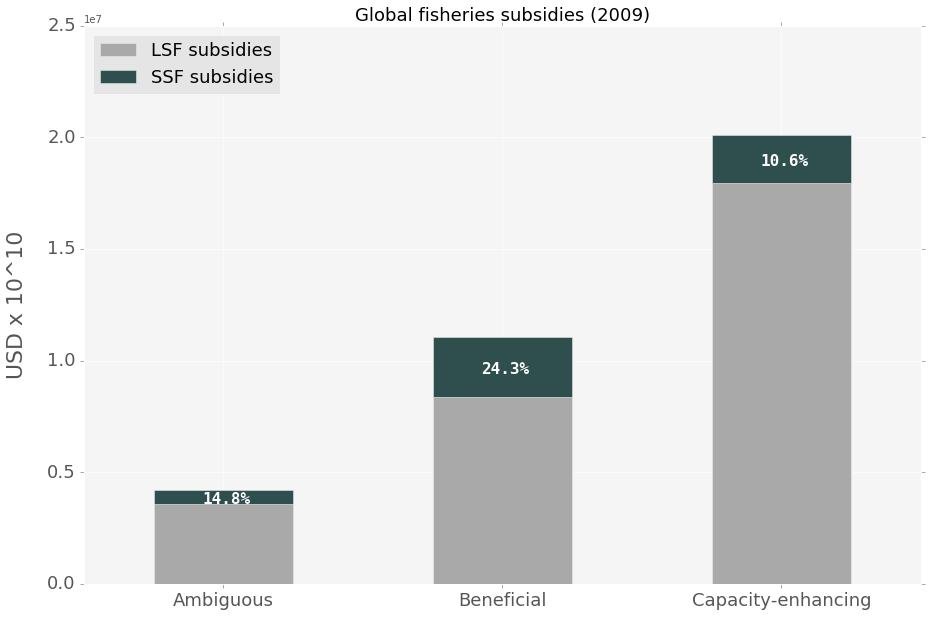

In [122]:


data = Subsidies_per_Category[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# these percentages are the SSF percent out of the total subsidie calculated in Subsidies_per_Category['SSF percent']
SSFpercent = (
    {'label': 'Ambiguous', 'percentage': 14.8}, 
    {'label': 'Beneficial', 'percentage': 24.3},
    {'label': 'Capacity-enhancing', 'percentage': 10.6}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# print("data_dict {}".format(data_dict))


# create subplot
ax = data.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"])
ax.set_title("Global fisheries subsidies (2009)", fontsize=18)
ax.set_ylabel("USD x 10^10",fontsize=22)
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Ambiguous','Beneficial', 'Capacity-enhancing'],rotation=360, fontsize=18)
ax.set_axis_bgcolor('0.96')
ax.yaxis.labelpad = 20

# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)

# prepare rects
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 


# now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #  get percenatage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage) / 2)
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  - 12.4**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=16,
        fontweight="bold",
        color="white"
    )


plt.savefig('Subsidies_Category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Category.pdf', dpi=400, bbox_inches='tight')
plt.legend(loc=2,fontsize=18)
plt.show()

In [123]:
SSF_subsidies_estimates_assessed.columns.values

array(['RegionName', 'Subregion', 'Countries', 'CLon', 'CLat', 'SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'EU member', 'Category',
       'SubType', 'Type', 'EEZ', 'total_catch', 'total_subsidies',
       'SSF_catch_percent', 'SSF_subregion_catch',
       'subsidies_subregion_all', 'Factor', 'SSF_subsidies_estimates',
       'SSF_subsidies_estimates_big', 'SSF_estimates_corrected',
       'SSFsubsidies_assessed_percent', 'weighted_by_sectorsize',
       'Data_group', 'SSF_USD_1000', 'SSF_subsidies_percent',
       'SSF_subsidies_percent_all', 'SSF subsidies', 'LSF subsidies'], dtype=object)

In [124]:
SSF_subsidies_estimates_assessed.replace(to_replace='Developed', value=1)
SSF = SSF_subsidies_estimates_assessed.loc[[330],['Developed']]
SSF

,Developed
330,True


In [125]:
Subsidies_per_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType']).sum()
Subsidies_per_subtype = Subsidies_per_subtype.sort_values(by=['total_subsidies'],ascending=False)

Subsidies_per_subtype['SSF percent'] = Subsidies_per_subtype['SSF subsidies']/Subsidies_per_subtype['total_subsidies']*100
Subsidies_per_subtype_billions = Subsidies_per_subtype.loc[:,['LSF subsidies','SSF subsidies']]
Subsidies_per_subtype_billions['LSF subsidies'] = Subsidies_per_subtype_billions['LSF subsidies']/1000000
Subsidies_per_subtype_billions['SSF subsidies'] = Subsidies_per_subtype_billions['SSF subsidies']/1000000

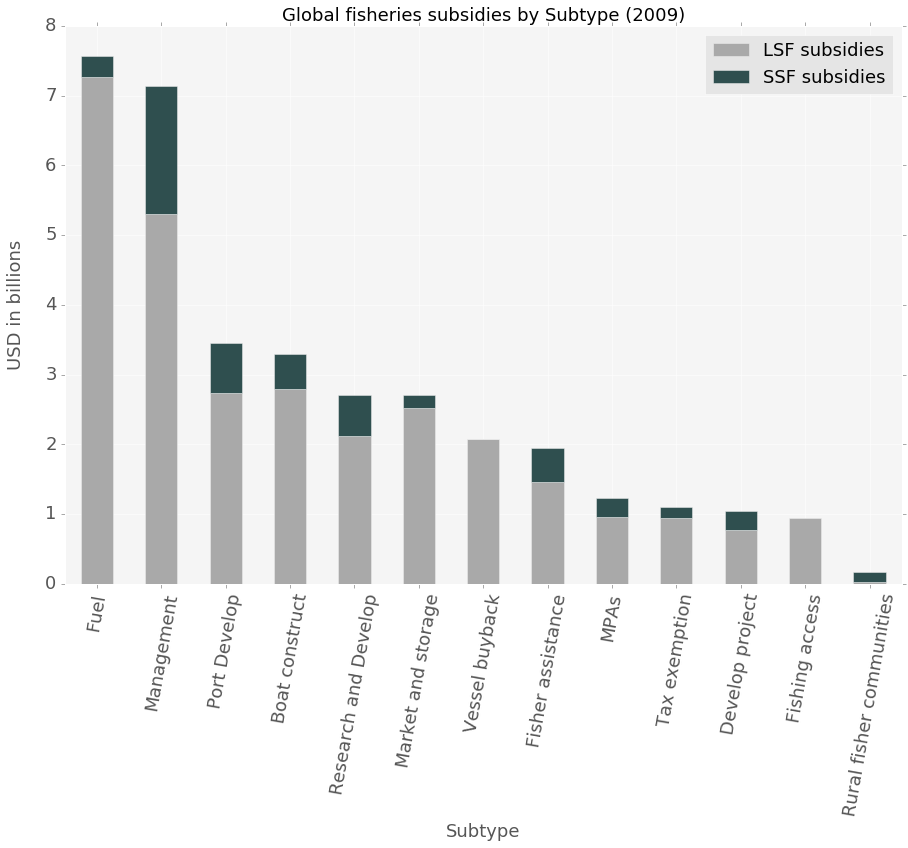

In [126]:
ax = Subsidies_per_subtype_billions[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Subtype (2009)", fontsize=18)
ax.set_ylabel("USD in billions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("Subtype",fontsize=18)
ax.set_xticklabels(['Fuel', 'Management','Port Develop','Boat construct','Research and Develop','Market and storage','Vessel buyback','Fisher assistance','MPAs','Tax exemption','Develop project','Fishing access','Rural fisher communities'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_Subtype.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Subtype.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [127]:
Subtypes = Subsidies_per_subtype.loc[:,['SSF percent', 'SSF subsidies','total_subsidies']]
Subtypes.to_csv('subtypes.csv')

In [128]:
Developed_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType','Developed']).sum()

Developed_short = Developed_subtype.loc[:,['SSF subsidies']]
Developed = Developed_short.reset_index()

Developed_pivot = Developed.pivot_table(['SSF subsidies'], index=['SubType'], columns='Developed')

Developed_grouped = Developed.groupby(['Developed','SubType']).sum()


Developed_stacked = Developed_grouped.stack()
Developed_stacked
Developed_pivot.to_csv('Developed_pivot.csv')
Developed_sorted = pd.read_csv('Developed_pivot_sorted.csv')
Developed_sorted = Developed_sorted.rename(columns={'Developing':'Developing countries', 'Developed':'Developed countries'})
print Developed_pivot
#  Developed_pivot['Total'] = Developed_pivot['False'] + Developed_pivot['True']

                          SSF subsidies             
Developed                         False        True 
SubType                                             
Boat constsruct. & renov.    252162.383   250510.751
Fisher assistance            102442.983   377134.600
Fisheries dev. projects      197455.408    71065.903
Fisheries mangt.             542507.800  1291419.630
Fishery R&D                  350632.016   237550.449
Fishing access                    0.000        0.000
Fishing port develop.         62933.470   659382.778
Fuel subsidies               105977.699   202593.242
MPAs                          82174.899   188365.685
Markt. & storage infrast.    104053.747    82327.723
Rural fisher communities     136397.493     1192.648
Tax exemption                 82300.613    64921.256
Vessel buyback                    0.000     3484.313


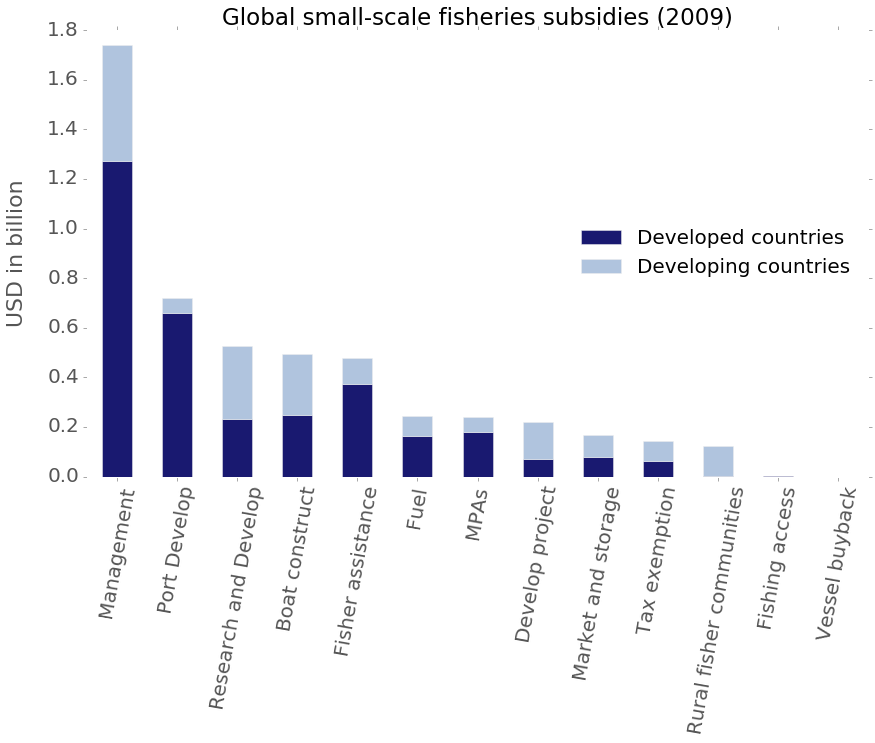

In [129]:
ax = Developed_sorted[['Developed countries','Developing countries']].plot(kind='bar', figsize=(14,8),stacked=True, legend=True, fontsize=20, color=["MidnightBlue","LightsteelBlue"])
            
ax.set_title("Global small-scale fisheries subsidies (2009)", fontsize=23)
ax.set_titlepad = 100
ax.set_ylabel("USD in billion",fontsize=22)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)

ax.set_xticklabels(['Management','Port Develop','Research and Develop','Boat construct','Fisher assistance','Fuel','MPAs','Develop project','Market and storage','Tax exemption','Rural fisher communities','Fishing access',
 'Vessel buyback'],rotation=80, fontsize=20)
ax.set_axis_bgcolor('w')

legend = plt.legend(loc=5,fontsize=20)
legend.get_frame().set_facecolor('w')

plt.savefig('Subsidies_Developed.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Developed.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [130]:
#  add another row to have a total value for developed and developing countries
#  calculate percentage for both developed and devleoping per subtype
Developed_sorted1 = Developed_sorted.append(Developed_sorted.sum(numeric_only=True), ignore_index=True)
Developed_sorted1['total'] = Developed_sorted1['Developing countries'] + Developed_sorted1['Developed countries']
Developed_sorted1['percent developed'] = Developed_sorted1['Developed countries'] / Developed_sorted1['total']*100
Developed_sorted1['percent developing'] = Developed_sorted1['Developing countries'] / Developed_sorted1['total']*100

Developed_sorted2 = Developed_sorted

In [175]:
Developed_category = SSF_subsidies_estimates_assessed.groupby(['Category','Developed']).sum()

DevelopedC_short = Developed_category.loc[:,['SSF subsidies']]

print DevelopedC_short

#  DevelopedC = DevelopedC_short.reset_index()

#  DevelopedC_pivot = DevelopedC_short.pivot_table(['SSF subsidies'], index=['Category'], columns='Developed')


#  DevelopedC_grouped = Developed.groupby(['Developed','Category']).sum()


DevelopedC = DevelopedC_short.unstack()
print DevelopedC
DevelopedC.to_csv('Developed_Category.csv')

#  DevelopedC_sorted = pd.read_csv('DevelopedC_pivot_sorted.csv')
#  DevelopedC_sorted = DevelopedC_sorted.rename(columns={'Developing':'Developing countries', 'Developed':'Developed countries'})
#  print Developed_pivot



                              SSF subsidies
Category           Developed               
Ambiguous          False         238840.475
                   True          381811.561
Beneficial         False         975314.714
                   True         1717335.764
Capacity-enhancing False         804883.320
                   True         1330801.652
                   SSF subsidies             
Developed                  False        True 
Category                                     
Ambiguous             238840.475   381811.561
Beneficial            975314.714  1717335.764
Capacity-enhancing    804883.320  1330801.652


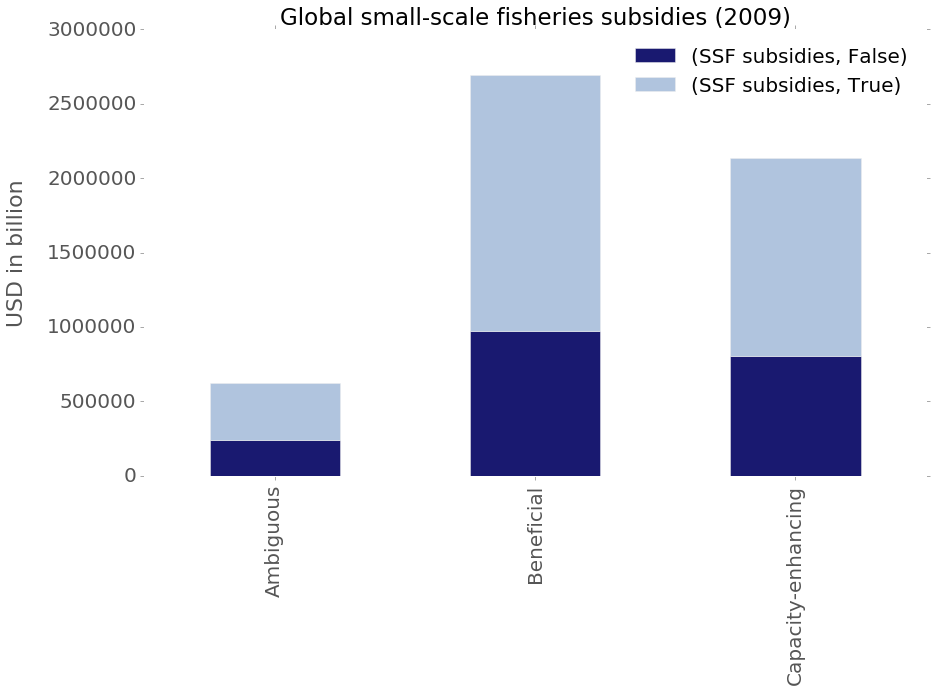

In [183]:
ax = DevelopedC.plot(kind='bar', figsize=(14,8),stacked=True, legend=True, fontsize=20, color=["MidnightBlue","LightsteelBlue"])
            
ax.set_title("Global small-scale fisheries subsidies (2009)", fontsize=23)
ax.set_titlepad = 100
ax.set_ylabel("USD in billion",fontsize=22)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)

#  ax.set_xticklabels([label],rotation=80, fontsize=20)
ax.set_axis_bgcolor('w')

legend = plt.legend(loc=1,fontsize=20)
legend.get_frame().set_facecolor('w')


#  plt.savefig('Subsidies_Developed.svg', dpi=400, bbox_inches='tight')
#  plt.savefig('Subsidies_Developed.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [131]:
305.0/138.0

2.210144927536232

In [132]:
SSF_subsidies_estimates_assessed.columns.values

array(['RegionName', 'Subregion', 'Countries', 'CLon', 'CLat', 'SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'EU member', 'Category',
       'SubType', 'Type', 'EEZ', 'total_catch', 'total_subsidies',
       'SSF_catch_percent', 'SSF_subregion_catch',
       'subsidies_subregion_all', 'Factor', 'SSF_subsidies_estimates',
       'SSF_subsidies_estimates_big', 'SSF_estimates_corrected',
       'SSFsubsidies_assessed_percent', 'weighted_by_sectorsize',
       'Data_group', 'SSF_USD_1000', 'SSF_subsidies_percent',
       'SSF_subsidies_percent_all', 'SSF subsidies', 'LSF subsidies'], dtype=object)

In [133]:
Subsidies_per_region = SSF_subsidies_estimates_assessed.groupby(['RegionName']).sum()
Subsidies_per_region['LSF subsidies'] = Subsidies_per_region['LSF subsidies']/1000000
Subsidies_per_region['SSF subsidies'] = Subsidies_per_region['SSF subsidies']/1000000
Subsidies_per_region = Subsidies_per_region.sort_values(by=['total_subsidies'],ascending=False)
Subsidies_per_region['SSF percent'] = (Subsidies_per_region['SSF subsidies']/(Subsidies_per_region['total_subsidies']/1000000)) *100
Subsidies_per_region['SSF percent'] 

RegionName
Asia                                     18.590
Europe                                    7.001
North America                            18.768
Oceania                                   4.243
South, Central America and Carribbean    31.108
Africa                                   32.260
Name: SSF percent, dtype: float64

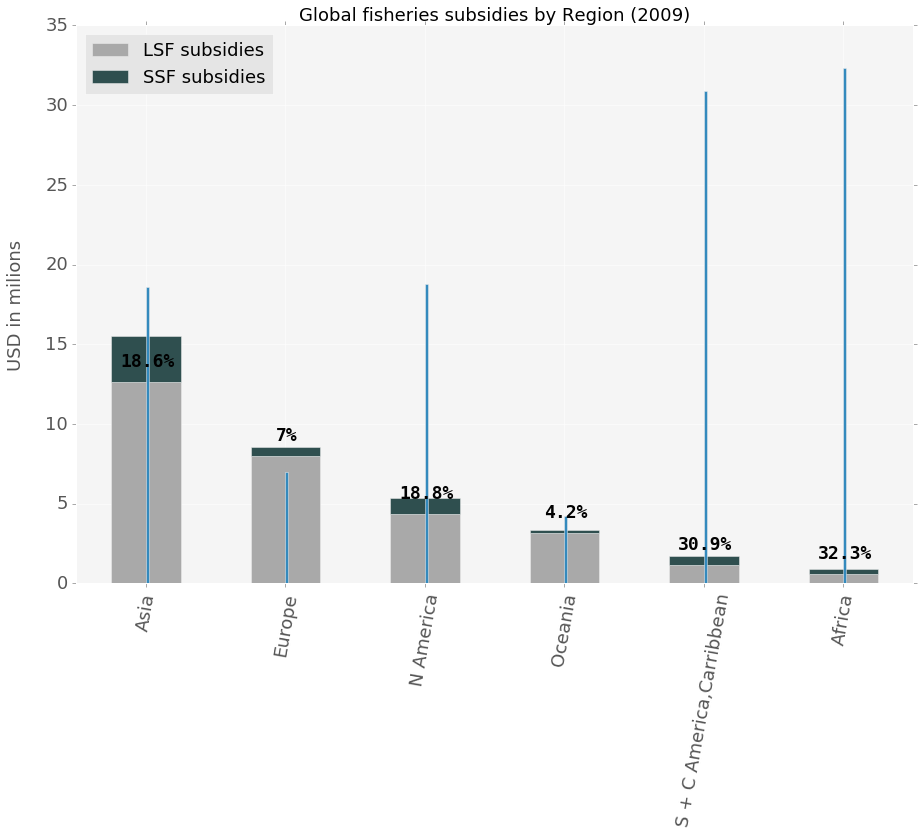

In [134]:

data = Subsidies_per_region[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# these percentages are the SSF percent out of the total subsidies calculated in Subsidies_per_region['SSF percent']
SSFpercent = (
    {'label': 'Asia', 'percentage': 18.6}, 
    {'label': 'Europe', 'percentage': 7},
    {'label': 'North America', 'percentage': 18.8},
    {'label': 'Oceania', 'percentage': 4.2},
    {'label': 'South, Central America and Carribbean', 'percentage': 30.9},
    {'label': 'Africa', 'percentage': 32.3}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            #  print("i = {}, k = {}".format(i, k))
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# make plot (also called subplot)
ax = data[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Region (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Asia', 'Europe','N America','Oceania','S + C America,Carribbean', 'Africa'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)


# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)
            
# prepare rects (rectangles)
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 

    # now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #print bar
    #  get percentage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage))
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  + 1**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=18,
        fontweight="bold",
        color="black"
    )

    


plt.show()

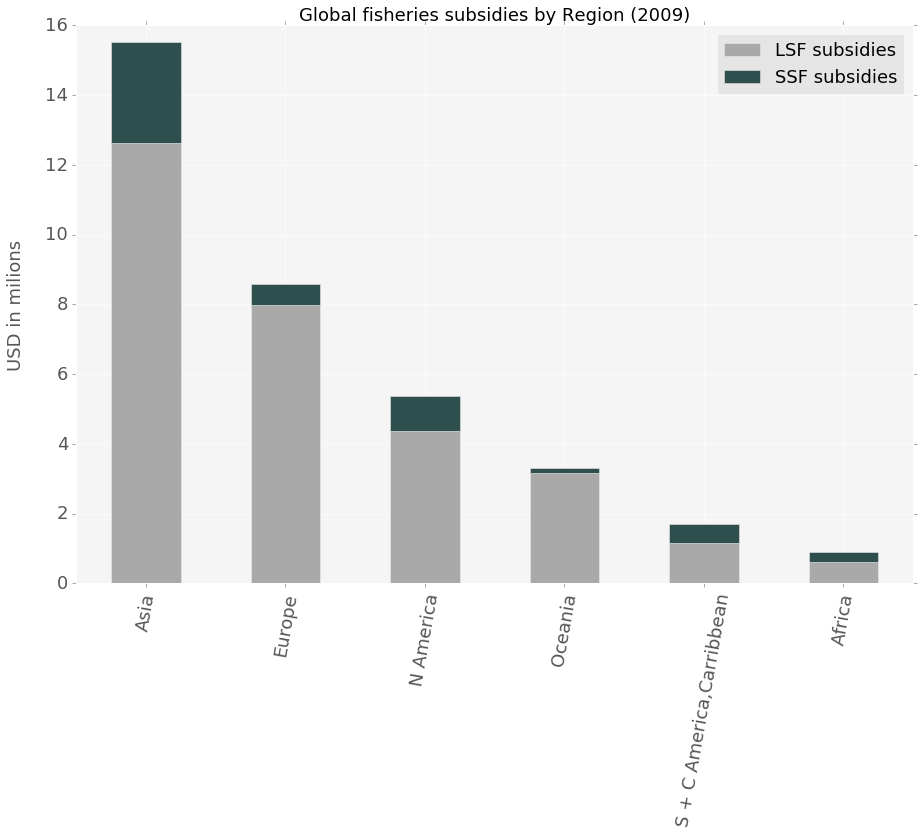

In [135]:
ax = data[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Region (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Asia', 'Europe','N America','Oceania','S + C America,Carribbean', 'Africa'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)

plt.savefig('Subsidies_Region.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Region.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [136]:
Subsidies_per_developed = SSF_subsidies_estimates_assessed.groupby(['Developed']).sum()
Subsidies_per_developed

,CLon,CLat,SIDS,TotPop,HDI,GDP,EU member,EEZ,total_catch,total_subsidies,...,SSF_subsidies_estimates,SSF_subsidies_estimates_big,SSF_estimates_corrected,SSFsubsidies_assessed_percent,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF_subsidies_percent_all,SSF subsidies,LSF subsidies
Developed,,,,,,,,,,,,,,,,,,,,,
False,19316.609,15789.526,455,52180446890,893.659,402298501815600,39,330,774341.1,12304224.252,...,607.327,218,472.749,11774.626,677,1754375.064,117.742,466.470,2019038.510,10285185.742
True,16431.901,18966.248,26,33573525102,460.395,878717203000000,260,123,645320.9,23066886.751,...,98.509,23,86.171,3312.532,540,3353663.411,33.130,86.329,3429948.977,19636937.774


In [137]:
Subsidies_per_developed['SSF_percent'] = Subsidies_per_developed['SSF subsidies']/Subsidies_per_developed['total_subsidies']*100
Subsidies_per_developed['SSF_percent']

Developed
False    16.409
True     14.870
Name: SSF_percent, dtype: float64

In [138]:
Subsidies_developed_category = SSF_subsidies_estimates_assessed.groupby(['Developed','Category']).sum()
Subsidies_developed_category['SSF_percent'] = Subsidies_developed_category['SSF subsidies']/Subsidies_developed_category['total_subsidies']*100
Subsidies_developed_category['SSF_percent']

Developed  Category          
False      Ambiguous             51.469
           Beneficial            26.463
           Capacity-enhancing     9.870
True       Ambiguous             10.259
           Beneficial            23.241
           Capacity-enhancing    11.131
Name: SSF_percent, dtype: float64

In [139]:
Subsidies_per_Subregion = SSF_subsidies_estimates_assessed.groupby(['Subregion']).sum()
#  print Subsidies_per_Subregion.loc[:,['total_subsidies']]

In [140]:
Subregions_all = Subsidies_per_Subregion.loc[:,['total_subsidies', 'SSF subsidies','LSF subsidies']]

Subregions_all_transposed = Subsidies_per_Subregion.loc[:,['SSF subsidies','LSF subsidies']].transpose()
Subregions_all_transposed

Subregion,Australia and New Zealand,Caribbean,Central America,Eastern Africa,Eastern Asia,Eastern Europe,Melanesia,Micronesia,Middle Africa,Northern Africa,...,Northern Europe,Polynesia,South America,Southeastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe
SSF subsidies,81707.154,80804.980,86578.657,22945.602,1779574.794,102740.639,17691.530,40142.673,82957.339,39448.036,...,134323.266,1291.266,403795.383,566116.260,2730.181,356346.673,168741.547,139567.170,182133.217,194021.023
LSF subsidies,482993.694,31745.161,238505.931,31134.123,8980960.467,2794791.608,714251.859,1970637.761,97657.344,211636.079,...,2297746.889,10349.079,1040600.933,2665324.132,149951.417,695527.213,2026489.253,113624.627,291982.389,848144.056


In [141]:
#  Subsidies_per_Subregion['total_size'] = Subsidies_per_Subregion['total_subsidies']/100000
#  Subsidies_per_Subregion['total_size'] 
Subregions_all.to_csv('Subsidies_per_Subregion.csv')

In [142]:
Europe = SSF_subsidies_estimates_assessed.pivot_table(['total_subsidies','SSF subsidies','LSF subsidies'], index=None, 
                                                      columns='EU member')

In [143]:
Europe

EU member,False,True
LSF subsidies,19934.732,18552.727
SSF subsidies,3985.477,1763.077
total_subsidies,17911.407,18617.158


In [144]:
#  sorting and grouping data by largest fishing nations to prepare for a graph

Subsidies_countries = SSF_subsidies_estimates_assessed.groupby(['EEZ','EU member','Countries']).sum()
print Subsidies_countries.columns.values
#  catch.groupby()
Subsidies_countries.sort_values(by=['total_catch'], ascending=False)

#  Subsidies_countries = Subsidies_countries.sort_values(by=['total_subsidies'], ascending=False)

['CLon' 'CLat' 'SIDS' 'TotPop' 'HDI' 'Developed' 'GDP' 'total_catch'
 'total_subsidies' 'SSF_catch_percent' 'SSF_subregion_catch'
 'subsidies_subregion_all' 'Factor' 'SSF_subsidies_estimates'
 'SSF_subsidies_estimates_big' 'SSF_estimates_corrected'
 'SSFsubsidies_assessed_percent' 'Data_group' 'SSF_USD_1000'
 'SSF_subsidies_percent' 'SSF_subsidies_percent_all' 'SSF subsidies'
 'LSF subsidies']


CLon     CLat  SIDS       TotPop    HDI  \
EEZ   EU member Countries                                                   
False False     China         1039.774  347.093     0  13556925760  7.190   
                Peru          -758.936 -114.908     0    301479350  7.370   
                USA          -1046.903  402.783     0   3188921030  9.140   
                Russian Fed    932.430  622.819     0   1424702720  7.780   
                Thailand      1008.703  156.043     0    677414010  7.220   
                Indonesia     1139.213   -7.893     0   2348934530  7.280   
                Japan         1394.673  367.429     0   1271033880  8.900   
                Chile         -698.332 -268.269     0    173638940  8.220   
                India          789.368  229.552     0  12363446310  5.860   
                Viet Nam      1082.772  140.583     0    934218350  6.380   
                Norway          90.328  605.585     0     51477920  9.440   
True  False     China          311.932  104.128     0   4067077728  2.157   
                Peru          -227.681  -34.472     0     90443805  2.211   
False False     Korea Rep     1273.384  381.731     0    490399860  8.910   
                Philippines   1208.841  153.514     0    846199740  7.710   
                Malaysia      1023.267   38.574     0    300733530  7.730   
                Mexico       -1017.773  218.921     0   1202866550  7.560   
True  False     Russian Fed    279.729  186.846     0    427410816  2.334   
                Indonesia      341.764   -2.368     0    704680359  2.184   
                Japan          418.402  110.229     0    381310164  2.670   
False True      Spain          -33.436  396.525     0    477379410  8.690   
      False     Morocco        -65.678  317.537     0    329872060  6.170   
      True      Denmark         93.054  562.842     0     55690770  9.000   
True  False     USA           -314.071  120.835     0    956676309  2.742   
False False     Argentina     -643.799 -337.072     0    430243740  8.080   
                Myanmar        960.425  209.961     0    557462530  5.240   
True  False     India          236.810   68.866     0   3709033893  1.758   
False False     Iceland       -186.768  648.804     0      3173510  8.950   
                Canada       -1064.246  565.320     0    348348410  9.020   
True  False     Chile         -209.500  -80.481     0     52091682  2.466   
...                                ...      ...   ...          ...    ...   
                Eritrea        115.725   46.813     0     19142409  1.143   
      True      Belgium         13.151  152.078     0     31348083  2.643   
      False     Belize        -266.539   51.783     3      1022532  2.196   
                Barbados      -178.650   39.454     3       869040  2.328   
                Israel         104.843   92.358     0     23465550  2.664   
False False     St Kitts Nev  -627.500  173.333    10       515380  7.500   
True  False     Timor Leste    377.693  -26.269     0      3604626  1.860   
                Tonga         -525.595  -63.537     3       319320  2.115   
False False     Montenegro     194.667  427.833   NaN      6200290  7.890   
                Djibouti       423.981  117.195     0      8101790  4.670   
True  False     Albania         60.150  122.802     0      9060627  2.247   
                Singapore      311.487    4.033     3     16701903  2.703   
                Sudan           91.572   47.388     0    106446699  1.419   
      True      Cyprus          99.371  104.947     0      3517374  2.535   
      False     Antigua Barb  -185.400   51.150     3       273885  2.322   
                Grenada       -185.040   36.293     3       330456  2.232   
      True      Malta           43.314  107.633     0      1237965  2.487   
      False     St Vincent    -183.520   39.683     3       308754  2.157   
                St Lucia      -182.927   41.701     3       490086  2.142   
                Djibouti      

In [145]:
#  sorting and grouping data by biggest subsidysing nations to graph them

Subsidies_countries = SSF_subsidies_estimates_assessed.groupby(['Countries']).sum()

Subsidies_countries = Subsidies_countries.sort_values(by=['total_subsidies'], ascending=False)


In [146]:
Subsidies_countries_major = Subsidies_countries.loc[['Japan','China','USA','Russian Fed','Micronesia','Spain','Korea Rep','Canada','Philippines', 'Viet Nam'],['total_subsidies','SSF subsidies','LSF subsidies']]

Subsidies_countries_major['LSF subsidies'] = Subsidies_countries_major['LSF subsidies']/1000000
Subsidies_countries_major['SSF subsidies'] = Subsidies_countries_major['SSF subsidies']/1000000
Subsidies_countries_major['total_subsidies'] = Subsidies_countries_major['total_subsidies']/1000000


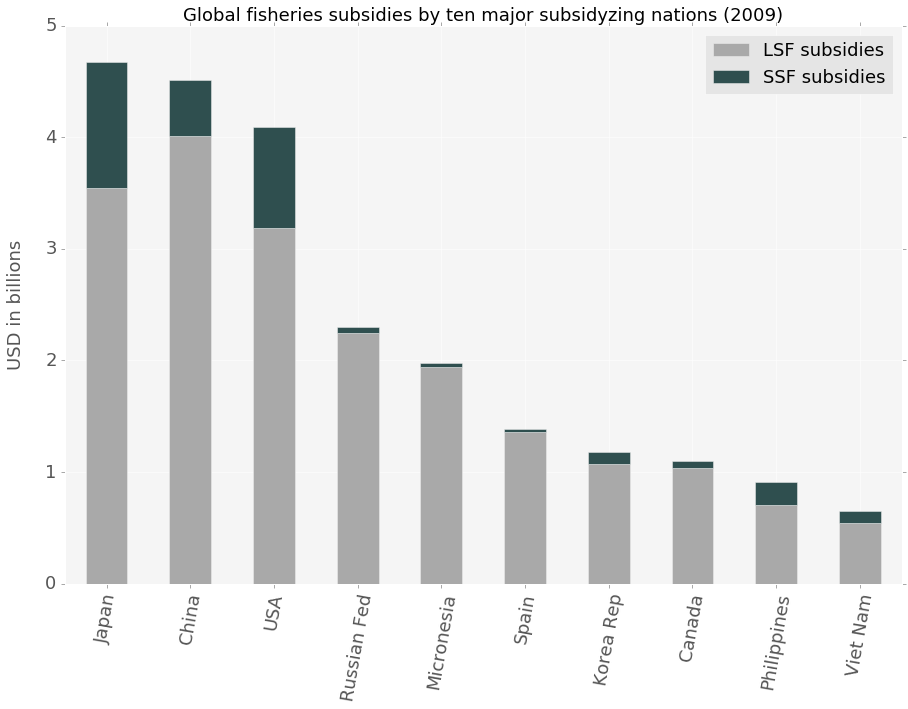

In [147]:
Subsidies_countries_major
ax = Subsidies_countries_major[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by ten major subsidyzing nations (2009)", fontsize=18)
ax.set_ylabel("USD in billions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Japan','China','USA','Russian Fed','Micronesia','Spain','Korea Rep','Canada','Philippines', 'Viet Nam'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)

plt.savefig('Subsidies_major.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_major.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [148]:
Subsidies_countries_major['SSF percent'] = Subsidies_countries_major['SSF subsidies']/Subsidies_countries_major['total_subsidies']*100 

In [149]:
Subsidies_countries_major.transpose()

Countries,Japan,China,USA,Russian Fed,Micronesia,Spain,Korea Rep,Canada,Philippines,Viet Nam
total_subsidies,4.670,4.509,4.091,2.300,1.976,1.388,1.180,1.102,0.908,0.651
SSF subsidies,1.129,0.498,0.902,0.055,0.038,0.033,0.105,0.063,0.208,0.109
LSF subsidies,3.540,4.011,3.189,2.245,1.938,1.355,1.075,1.039,0.700,0.542
SSF percent,24.184,11.039,22.046,2.389,1.936,2.388,8.931,5.750,22.917,16.694


In [150]:
#  work with SSF_subsidies
#  organize data by data group which is 1,2 or 3 and have frequencies per subytype of all assessed subsidies data
#  this includes 73 countries that have been assessed
print SSF_subsidies.columns.values
Data_group = pd.crosstab(SSF_subsidies.SubType, SSF_subsidies.Data_group)
print Data_group.columns.values
Data_group = Data_group.reset_index()
Data_group

['ID' 'Cnumber' 'RegionID' 'RegionName' 'Type' 'SubType' 'Category'
 'total_subsidies' 'NewData' 'Developed' 'HDI_2005' 'Countries'
 'SSFsubsidies_assessed_percent' 'weighted_by_sectorsize' 'Data_group'
 'SSF_totalCatch_EEZ_percent' '%SSF_totalCatch_Country' 'SSF_USD_1000'
 'Comment' 'DocSource' 'SourceVisitDate' 'Ref' 'URL' 'User' 'OldComment'
 'SSF_subsidies_percent']
[ 1.  2.  3.]


Data_group,SubType,1.0,2.0,3.0
0,Boat constsruct. & renov.,2,25,16
1,Fisher assistance,3,11,14
2,Fisheries dev. projects,6,29,21
3,Fisheries mangt.,2,29,40
4,Fishery R&D,2,19,37
5,Fishing access,1,5,11
6,Fishing port develop.,2,12,9
7,Fuel subsidies,27,0,0
8,MPAs,0,1,63
9,Markt. & storage infrast.,4,27,18


In [151]:
Data_group_percentages = pd.crosstab(SSF_subsidies.SubType, SSF_subsidies.Data_group).apply(lambda r: r/r.sum(), axis=1)
Data_group_percentages

Data_group,1.0,2.0,3.0
SubType,,,
Boat constsruct. & renov.,0.047,0.581,0.372
Fisher assistance,0.107,0.393,0.500
Fisheries dev. projects,0.107,0.518,0.375
Fisheries mangt.,0.028,0.408,0.563
Fishery R&D,0.034,0.328,0.638
Fishing access,0.059,0.294,0.647
Fishing port develop.,0.087,0.522,0.391
Fuel subsidies,1.000,0.000,0.000
MPAs,0.000,0.016,0.984


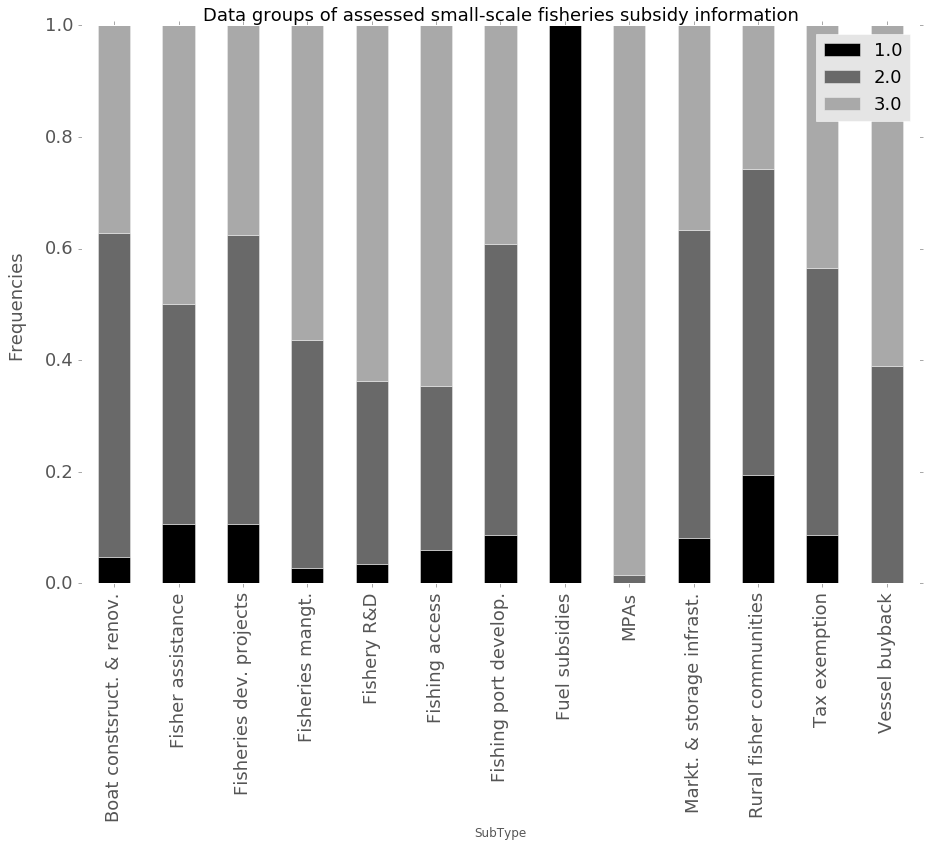

In [152]:
ax = Data_group_percentages.plot(kind='bar', figsize=(15,10), stacked = True, fontsize=18, color=["black","dimgray", "darkgray"])
ax.set_title("Data groups of assessed small-scale fisheries subsidy information", fontsize=18)
ax.set_ylabel("Frequencies",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_axis_bgcolor('w')
plt.legend(loc=1,fontsize=18)

plt.savefig('Data_groups_percentages.svg', dpi=400, bbox_inches='tight')
plt.savefig('Data_groups_percentages.pdf', dpi=400, bbox_inches='tight')
plt.show()

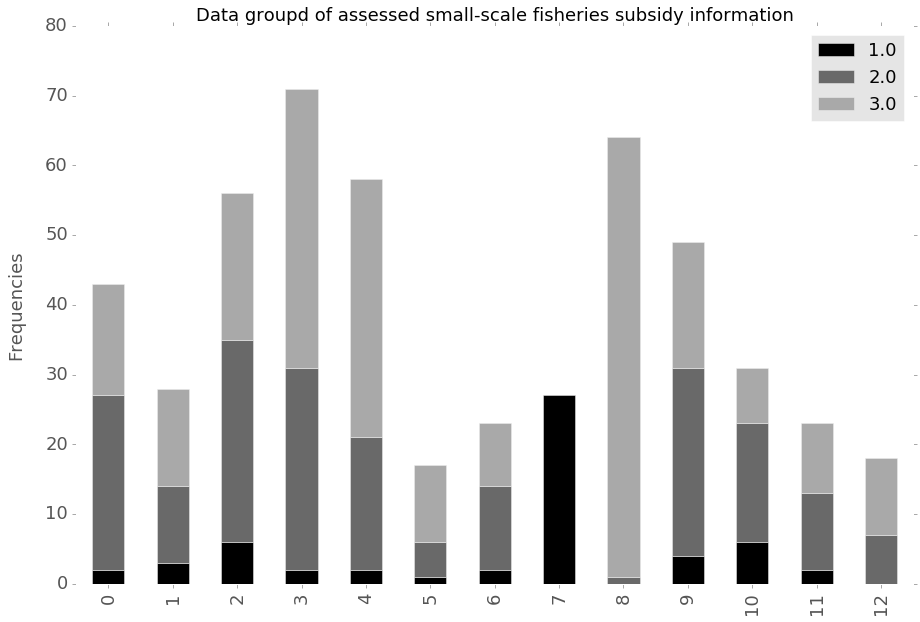

In [153]:
ax = Data_group.plot(kind='bar', figsize=(15,10), stacked = True, fontsize=18, color=["black","dimgray", "darkgray"])
ax.set_title("Data groupd of assessed small-scale fisheries subsidy information", fontsize=18)
ax.set_ylabel("Frequencies",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_axis_bgcolor('w')
plt.legend(loc='best',fontsize=18)

plt.savefig('Data_groups.svg', dpi=400, bbox_inches='tight')
plt.savefig('Data_groups.pdf', dpi=400, bbox_inches='tight')
plt.show()

